# Practice 6.
Objectives:
Understand the Random Forests.
See the effects of changing the parameters of the tree.
Aplication:
Data base: Datasets for "The Elements of Statistical Learning" (https://web.stanford.edu/~hastie/ElemStatLearn/data.html)

Database: coronary heart disease (CHD), https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data

Predict CHD (1 or 0)

In [35]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Let us load the database and   clean it up.

In [2]:
File = "SouthAfricanHeartDesease.csv"
Filename = os.path.join(os.getcwd(),'Data',File)
print(f'Filename with path: \n {Filename}')
Data = pd.read_csv(Filename)
Data.head().T

Filename with path: 
 /Users/enric/Desktop/MachineLearningPrim2021/practices/Data/SouthAfricanHeartDesease.csv


,0,1,2,3,4
row.names,1,2,3,4,5
sbp,160,144,118,170,134
tobacco,12,0.01,0.08,7.5,13.6
ldl,5.73,4.41,3.48,6.41,3.5
adiposity,23.11,28.61,32.28,38.03,27.78
famhist,Present,Absent,Present,Present,Present
typea,49,55,52,51,60
obesity,25.3,28.87,29.14,31.99,25.99
alcohol,97.2,2.06,3.81,24.26,57.34
age,52,63,46,58,49


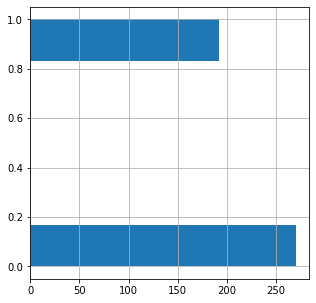

In [3]:
Coding_famhist ={'Present':1,'Absent':0}
Data['famhist'] = Data['famhist'].map(Coding_famhist)
ax =Data['famhist'].hist(figsize= (5,5),orientation="horizontal",bins = 6)

Data.drop(columns = ['row.names'],inplace = True)

##  First we partition database into train and test
### Note the helper function

In [4]:
def PartitionOfDatabase(Data,Fraction = 0.75):
    NumSamples, NumFeatures = Data.shape
    Index = list(range(NumSamples))
    RandomIndex = np.random.permutation(Index)
    NumTrainElements = int(Fraction*NumSamples)
    TrainIndex = RandomIndex[:NumTrainElements]
    TestIndex = RandomIndex[NumTrainElements:]
    TrainDB = Data.iloc[TrainIndex]
    TestDB = Data.iloc[TestIndex]
    return TrainDB,TestDB


In [5]:
TrainDB,TestDB = PartitionOfDatabase(Data,Fraction = 0.75)
y = TrainDB['chd']
InputFeatures = [fea for fea in TrainDB.columns if  fea != 'chd']
print(f' Input variables: \n {InputFeatures}')
print('_'*50)
X = TrainDB[InputFeatures]

 Input variables: 
 ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
__________________________________________________


##  Now we create the object Random Forest and fit it

In [6]:
clf = RandomForestClassifier(n_estimators=1000, max_features='sqrt', oob_score=True,n_jobs=4)
clf.fit(X, y)

RandomForestClassifier(max_features='sqrt', n_estimators=1000, n_jobs=4,
                       oob_score=True)

### The Out of Bag estimate should give something similar to the test value.

In [7]:
oob_error = 1 - clf.oob_score_
print(f'Out of Bag estimate of the error:{oob_error*100:2.2f} %')

Out of Bag estimate of the error:31.50 %


## Let us see the importance of the variables

In [8]:
clf.feature_importances_

array([0.10480934, 0.15678332, 0.13917801, 0.11149137, 0.04004466,
       0.11791947, 0.10147343, 0.08684336, 0.14145705])

### We will use pandas to create a visualization

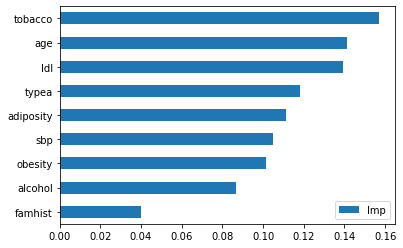

In [9]:
FeaImp=pd.DataFrame(data =clf.feature_importances_,index =  InputFeatures,columns = ['Imp'])
FeaImp.sort_values(by = ['Imp'],inplace = True)
ax = FeaImp.plot.barh()

In [10]:
## Remember the tree we created in the last practice

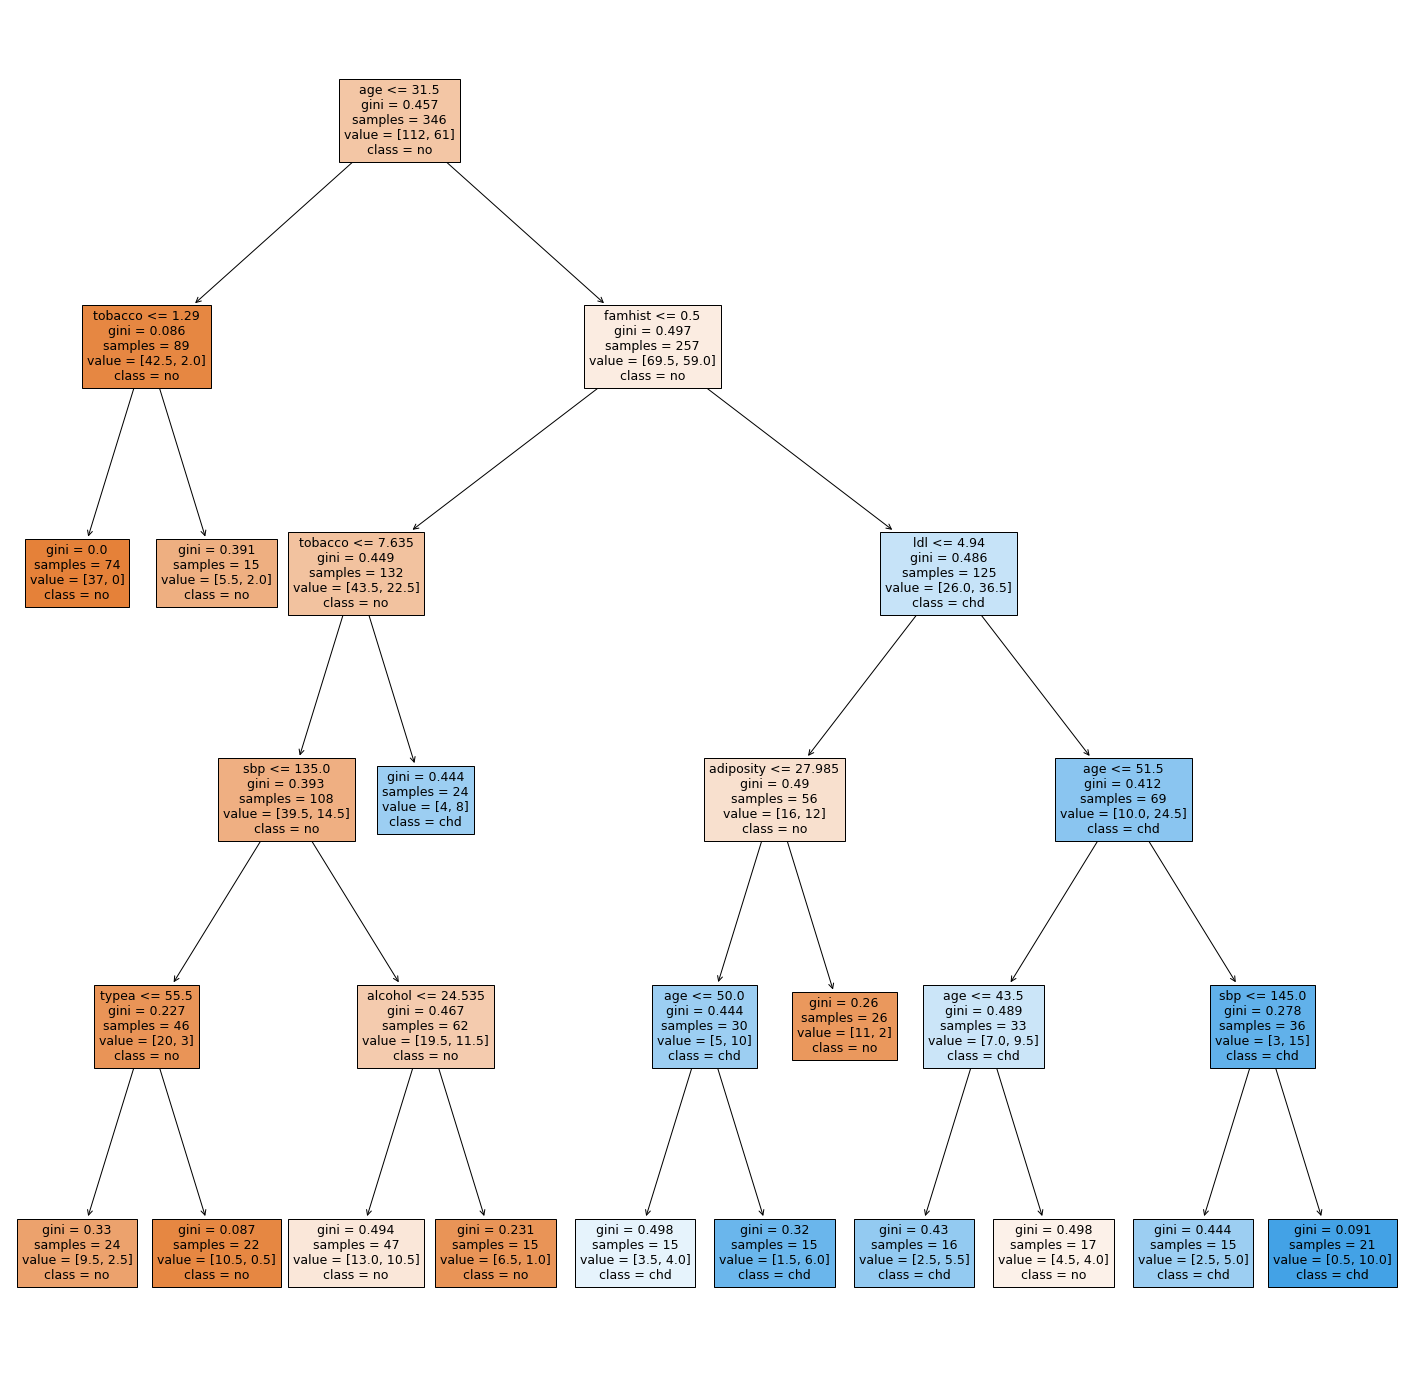

##  Performance on train
**Definition:**
$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$


Accuracy (train)  100.0% 
[[233   0]
 [  0 113]]


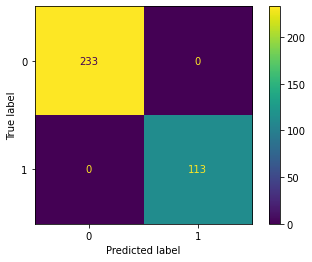

In [11]:
y_hat = clf.predict(X)
accuracy = accuracy_score(y, y_hat)
print("Accuracy (train)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y, y_hat))
plot_confusion_matrix(clf, X, y)  
plt.show()

## Remember for a single tree we had 
Accuracy (train)  78.6% 

[[195  29]

 [ 45  77]]

## Performance on test
### Note it is almost the same that the Out of Bag estimate.

Accuracy (test)  71.6% 
[[61  8]
 [25 22]]


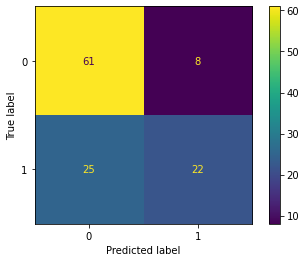

In [12]:
y_tst = TestDB['chd']
X_tst = TestDB[InputFeatures]
y_hat_tst = clf.predict(X_tst)
accuracy = accuracy_score(y_tst, y_hat_tst)
print("Accuracy (test)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y_tst, y_hat_tst))
plot_confusion_matrix(clf, X_tst, y_tst)  
plt.show()

## Better than the case of one only tree
Accuracy (test)  63.8% 

[[58 20]
 
 [22 16]]


### Homework: <font color='red'>   Plot the evolution of the Out of Bag error and the test error as a function of the number of trees.  For instance from 100 to 2000 in increments of 100.</font> 

### Homework: <font color='red'>    **Important**: we still have too many false negatives. Try  changing the class_weight = {0:0.5,1:0.5}.  </font>



# Explore another database. Data appliances database
### See practice 3.

### Homework: <font color='red'>    Rememeber it is a regression problem, therefore use the method RandomForestRegressor.  </font>

### Homework: <font color='red'>    Try to predict with random forest. Rememeber the histogram of  the target value, 'Appliances'. Do the experiment with threshold and without. How does $R^2(y, \hat{y})$ and RMSE change from the case of linear regression?, (note that one can improve and the other not). how does the plot y vs. $\hat{y} $ change? </font>

### Homework: <font color='red'>    Explore the features that the random forest allows, such as controlling the number of elements by leaf, etc. See  web page https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_ </font>

### Homework: <font color='red'>    Consider predict the output in logarithmic scale (use base 10 for interpretation purposes) . What information are you getting with the appliances in log scale? Hint look at the histogram.</font>

### Homework: <font color='red'>    Compare the ranking of variables given by the random forest with the size of the weights of the linear regression. Explain  why the colinearity does not affect the performance in this case.</font>

### Homework: <font color='red'>    Try to solve the problem with a single decision tree. Which rule can you get. (use from sklearn.tree import DecisionTreeRegressor)</font>

In [50]:
File = "energydata_complete.csv"
Filename = os.path.join(os.getcwd(),'Data',File)
print(f'Filename with path: \n {Filename}')
Data = pd.read_csv(Filename)
#Data.head().T

Filename with path: 
 /Users/enric/Desktop/MachineLearningPrim2021/practices/Data/energydata_complete.csv


## Next we will clean the database

In [51]:
#Threshold = 200
#Data = Data[Data['Appliances']<Threshold]
date_raw = pd.to_datetime(Data['date'])
date_raw.map(lambda x: x.day)
day_month = date_raw.map(lambda x: x.day)
day_week = date_raw.map(lambda x: x.dayofweek)
hour_day = date_raw.map(lambda x: x.hour)
Data['day_month'] = day_month
Data['day_week'] = day_week
Data['hour_day'] = hour_day
#Data['Appliances'] = np.log10(Data['Appliances'].values+1)
Data['Time from Midning'] = np.sqrt(np.power(np.sin(2*np.pi*hour_day/24.),2)+np.power(1.-np.cos(2*np.pi*hour_day/24.),2))
Data.drop(columns = ['date','rv1','rv2'],inplace = True)

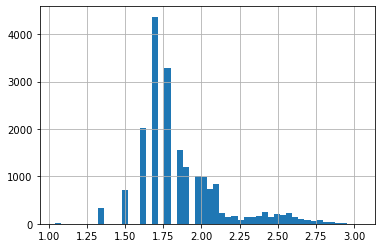

In [52]:
ax = Data['Appliances'].hist(bins = 50)
clf = None

### Homework: <font color='red'>    Repeat the practice with this database and compare with the results of when using linear regressio.</font>
### Homework: <font color='red'>    Could you comment on the differences you find, i.e. difficulty in finding a good model, and performance.</font>